In [1]:
from google.colab import files
uploaded = files.upload()


Saving Unemployment in India.csv to Unemployment in India.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all columns
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('Unemployment in India.csv')
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
# Check for missing values
print(df.isnull().sum())

# Rename columns for consistency
df.columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Area']

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


/tmp/ipython-input-799178672.py:8: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


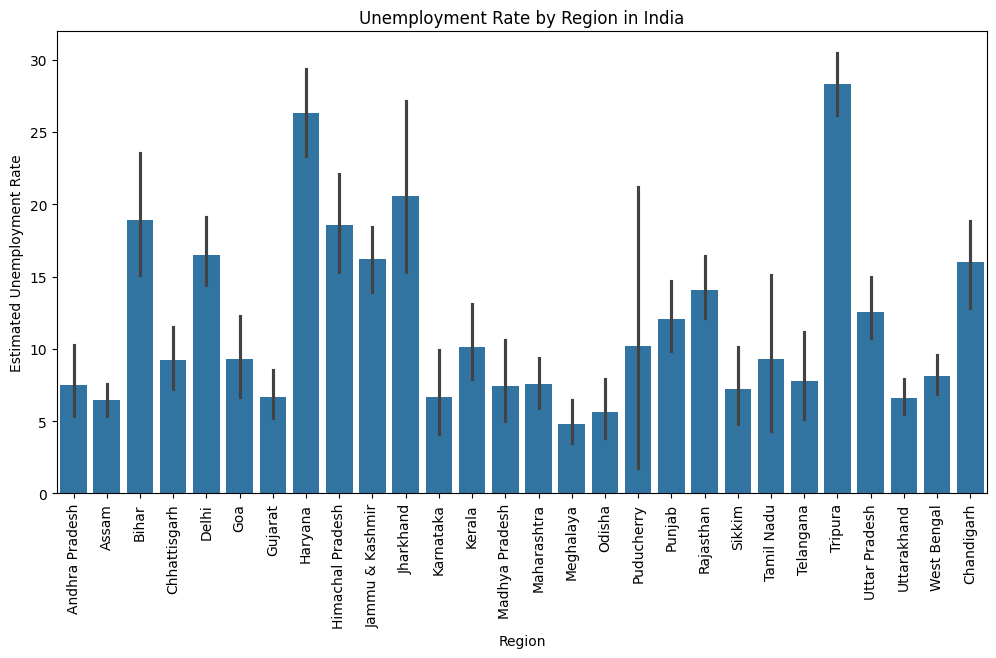

In [6]:
plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by Region in India')
plt.show()


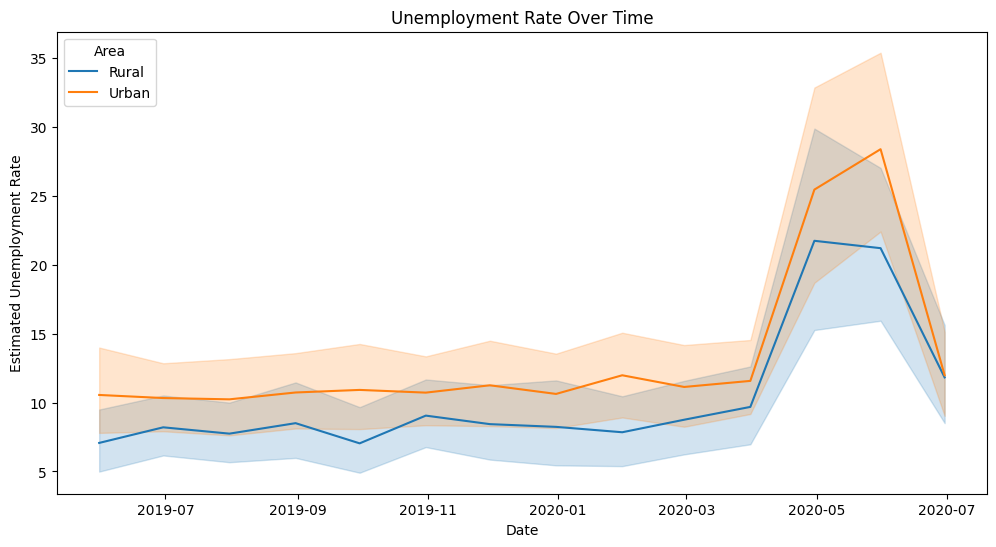

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate', hue='Area', data=df)
plt.title('Unemployment Rate Over Time')
plt.show()


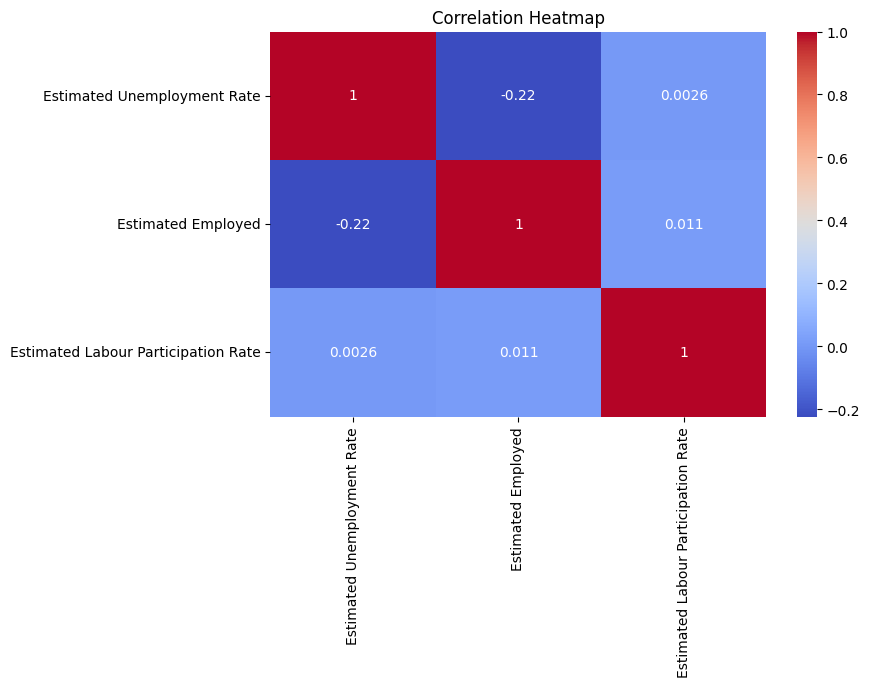

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
print("Highest Unemployment Rate Region:", df.groupby('Region')['Estimated Unemployment Rate'].mean().idxmax())
print("Lowest Unemployment Rate Region:", df.groupby('Region')['Estimated Unemployment Rate'].mean().idxmin())


Highest Unemployment Rate Region: Tripura
Lowest Unemployment Rate Region: Meghalaya


In [10]:
!pip install plotly
import plotly.express as px


In [11]:
# Average unemployment rate by region
region_unemp = df.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

fig = px.choropleth(
    region_unemp,
    locationmode="country names",  # use region names as country-like labels
    locations="Region",
    color="Estimated Unemployment Rate",
    hover_name="Region",
    color_continuous_scale="Reds",
    title="Average Unemployment Rate by Region in India"
)
fig.show()


In [12]:
import json
import requests

# Get GeoJSON of Indian states
url = 'https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson'
geojson = requests.get(url).json()

# Average unemployment by region
region_unemp = df.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

# Match names manually if dataset names differ from GeoJSON
fig = px.choropleth(
    region_unemp,
    geojson=geojson,
    featureidkey='properties.NAME_1',
    locations='Region',
    color='Estimated Unemployment Rate',
    color_continuous_scale='OrRd',
    title='Unemployment Rate Across Indian States'
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [13]:
fig = px.choropleth(
    df,
    geojson=geojson,
    featureidkey='properties.NAME_1',
    locations='Region',
    color='Estimated Unemployment Rate',
    animation_frame='Date',
    color_continuous_scale='Viridis',
    range_color=(df['Estimated Unemployment Rate'].min(), df['Estimated Unemployment Rate'].max()),
    title='Unemployment Rate Over Time (Animated)'
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


Output hidden; open in https://colab.research.google.com to view.